In [1]:
import os
import re
import cv2
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt

In [2]:
#Getr frames from a video
# Opens the Video file
#E:\python\Pivotchain company project\dataset\frames1_VehicleTracking
ExtractedFrames = "E:/python/Pivotchain company project/dataset/frames1/"
cap= cv2.VideoCapture('E:/python/Pivotchain company project/dataset/video1/video1.mp4')
k=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False or k > 500:
        break
    cv2.imwrite(ExtractedFrames+'ExtractedFrames'+str(k)+'.jpg',frame)
    k+=1
 
cap.release()
cv2.destroyAllWindows()

In [3]:
col_frames = os.listdir('E:/python/Pivotchain company project/dataset/frames1/')
#E:\python\Pivotchain company project\dataset\frames1

In [4]:
#col_frames

In [5]:
# sorting
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

In [6]:
#col_frames

In [7]:
col_images=[]

for i in col_frames:
    img = cv2.imread('E:/python/Pivotchain company project/dataset/frames1/'+i)
    col_images.append(img)

In [8]:
#col_images

In [9]:
#plt.imshow(col_images[1])

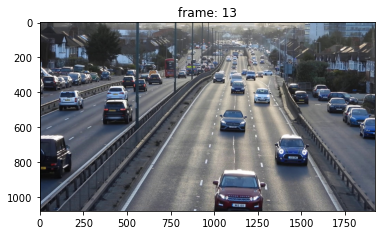

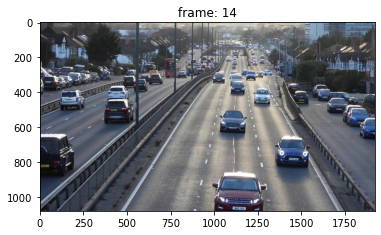

In [10]:
# plot 13th and 14th frame
i = 13

for frame in [i, i+1]:
    plt.imshow(cv2.cvtColor(col_images[frame], cv2.COLOR_BGR2RGB))
    plt.title("frame: "+str(frame))
    plt.show()

In [11]:
# convert the frames to grayscale
#grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
#grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)

In [12]:
#plt.imshow(grayA)

In [13]:
#plt.imshow(grayB)

In [14]:
#plt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')
#plt.show()

In [15]:
#diff_image = cv2.absdiff(grayB, grayA)

# Image thresholding
#ret, thresh = cv2.threshold(diff_image, 80, 255, cv2.THRESH_BINARY)

#plt.imshow(thresh, cmap = 'gray')
#plt.show()

In [16]:
# Image dilation
#kernel = np.ones((10,10),np.uint8)
#dilated = cv2.dilate(thresh,kernel,iterations = 1)

#plt.imshow(dilated, cmap = 'gray')
#plt.show()

In [17]:
# plot vehicle detection zone
#plt.imshow(dilated)
#cv2.line(dilated, (0, 400),(1750,400),(255, 255, 255))
#plt.show()

In [18]:
# find contours
#contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [19]:
#valid_cntrs = []
#centroids = []
#centroid_dict = {}
#x = y = w = h = 0
#for i,cntr in enumerate(contours):
#    x,y,w,h = cv2.boundingRect(cntr)
#    if (x <= 1750) & (y >= 400) & (cv2.contourArea(cntr) >= 1000):
#        valid_cntrs.append(cntr)
#        #centroids.append((int((x+(x+w))/2),int((y+(y+h))/2)))
        
# count of discovered contours
#len(valid_cntrs)

In [20]:
#len(centroids)

In [21]:
#centroids

In [22]:
#dmy = col_images[13].copy()

#cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 10)
##cv2.rectangle(dmy,(x,y),(x+w,y+h),(0, 180, 0),4)
##cv2.line(dmy, centroids[0], centroids[1],(150, 150, 150))
#cv2.line(dmy, (0, 400),(1750,400),(255, 255, 255),2)
#plt.imshow(dmy)
#plt.show()

In [23]:
# specify video name
pathOut = 'E:/python/Pivotchain company project/dataset/video1_VehicleTracking/Vehicle_detection_Video.mp4'
#E:\python\Pivotchain company project\dataset\video1_VehicleTracking
# specify frames per second
fps = 15.0

OneUnit = 20 #cm

In [24]:
def Calc_speed(centroid2,centroid1):
    speed = []
    for cent2 in centroid2:
        dist=999999
        for cent1 in centroid1:
            temp_dist=int((((cent2[0] - cent1[0])**2) + ((cent2[1]-cent1[1])**2))**0.5)
            if (temp_dist < dist):
                dist = temp_dist
        speed.append(round((dist*OneUnit*fps)*0.036))   #speed in kmph
    return speed

In [25]:
# kernel for image dilation
kernel = np.ones((15,15),np.uint8)

# font style
font = cv2.FONT_HERSHEY_SIMPLEX

# directory to save the ouput frames
pathIn = "E:/python/Pivotchain company project/dataset/frames1_VehicleTracking/"
#E:\python\Pivotchain company project\dataset\frames1_VehicleTracking

centroids = {}
rectangle = {}

for i in range(len(col_images)-1):

    # frame differencing
    grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)
    diff_image = cv2.absdiff(grayB, grayA)
    
    # image thresholding
    ret, thresh = cv2.threshold(diff_image, 80, 255, cv2.THRESH_BINARY)
    
    # image dilation
    dilated = cv2.dilate(thresh,kernel,iterations = 1)

    # find contours
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

    # shortlist contours appearing in the detection zone
    valid_cntrs = []
    valid_bounding_box = []
    coordinates = []
    
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (x <= 1750) & (x >= 400) & (y >= 400) & (cv2.contourArea(cntr) >= 10000):
            valid_cntrs.append(cntr)
            valid_bounding_box.append((x,y,w,h))
            coordinates.append((int((x+(x+w))/2),int((y+(y+h))/2)))

    centroids[i] = coordinates
    rectangle[i] = valid_bounding_box
    
    speed = []
    dmy = col_images[i].copy()
    #cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 10)
    cv2.putText(dmy, "vehicles detected: " + str(len(valid_cntrs)), (80, 65), font, 1, (0, 180, 0), 2)
    cv2.line(dmy, (0, 400),(1750,400),(255, 255, 255))
    
    # add contours to original frames
    if (i == 0):
        speed=0       
    else:
        if(not centroids[i] or not centroids[i-1]):
            speed=0
        else:
            speed=Calc_speed(centroids[i], centroids[i-1])
        if(speed):
            for j in range(len(speed)):
                cv2.putText(dmy, "Speed :" + str(speed[j]) + "Kmph", (centroids[i][j][0],centroids[i][j][1]), font, 0.8, (0, 0, 255), 2)
                cv2.rectangle(dmy,(rectangle[i][j][0],rectangle[i][j][1]),(rectangle[i][j][0]+rectangle[i][j][2],rectangle[i][j][1]+rectangle[i][j][3]),(0, 180, 0),2)
    cv2.imwrite(pathIn+str(i)+'.png',dmy)

In [26]:
#centroids

In [27]:
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]

In [28]:
files.sort(key=lambda f: int(re.sub('\D', '', f)))

for i in range(len(files)):
    filename=pathIn + files[i]
    
    #read frames
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

In [29]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])

out.release()